In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import statsmodels.formula.api as sm

# Loading Data

In [21]:
df=pd.read_csv('Advertising.csv',delimiter=',')
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Plotting the Relationship between Sales and TV, Radio and Newspaper

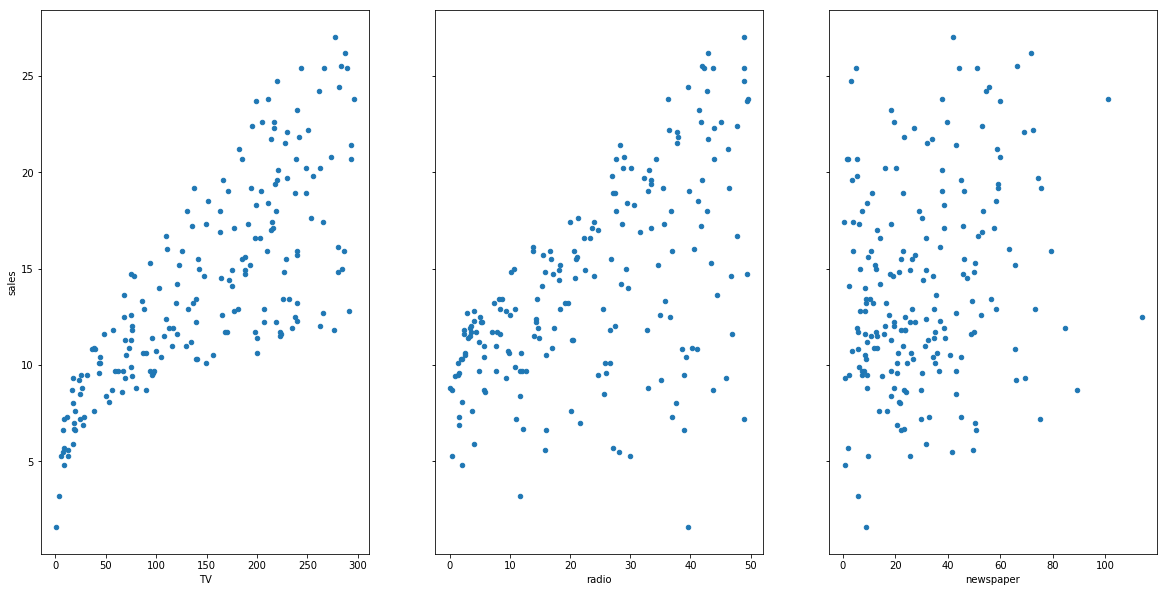

In [4]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(20, 10))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

# Simple Linear Regression

### Sales and TV

In [6]:
res1 = sm.ols(formula = 'sales ~ TV', data=df).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        18:56:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

### Sales and Radio

In [7]:
res2 = sm.ols(formula = 'sales ~ radio', data=df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.35e-19
Time:                        18:57:04   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

### Sales and Newspaper

In [8]:
res3 = sm.ols(formula = 'sales ~ newspaper', data=df).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 06 Feb 2019   Prob (F-statistic):            0.00115
Time:                        18:57:09   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

__Looking at the p-values, we can assume that TV, newspaper and radio all have some effect on Sales, in the three models we have created above. But the one with strongest effect on Sales is TV. It has maximum R-squared also.__

# Plotting the three models

In [9]:
x1 = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
pred1 = res1.predict(x1)
x2 = pd.DataFrame({'radio': [df.radio.min(), df.radio.max()]})
pred2 = res2.predict(x2)
x3 = pd.DataFrame({'newspaper': [df.newspaper.min(), df.newspaper.max()]})
pred3 = res3.predict(x3)

<function matplotlib.pyplot.show(*args, **kw)>

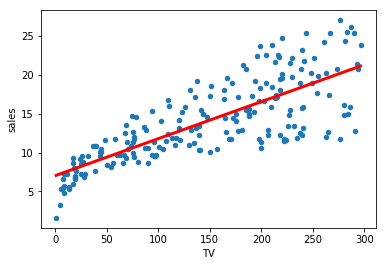

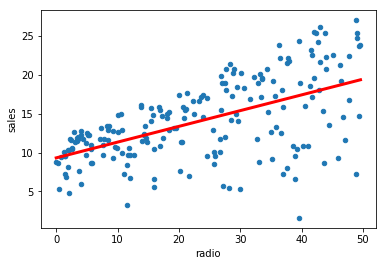

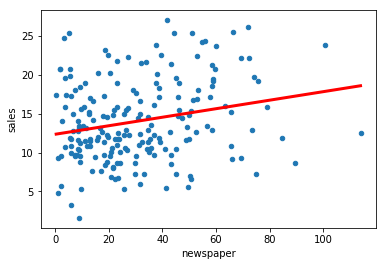

In [147]:
df.plot(kind='scatter', x='TV', y='sales')
plt.plot(x1, pred1, c='red', linewidth=3)
df.plot(kind='scatter', x='radio', y='sales')
plt.plot(x2, pred2, c='red', linewidth=3)
df.plot(kind='scatter', x='newspaper', y='sales')
plt.plot(x3, pred3, c='red', linewidth=3

# Multiple Linear Regression

In [47]:
res4 = sm.ols(formula = 'sales ~ TV + radio + newspaper', data=df).fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           1.58e-96
Time:                        11:54:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [67]:
res5 = sm.ols(formula = 'sales ~ TV + radio', data=df).fit()
res6 = sm.ols(formula = 'sales ~ TV + radio + newspaper', data=df).fit()
print(' R-squared values for \n Sales on TV: {}\n Sales on TV and Radio: {}\n Sales on TV and Radio and Newspaper: {} '.format(res1.rsquared, res5.rsquared, res4. rsquared))

 R-squared values for 
 Sales on TV: 0.611875050850071
 Sales on TV and Radio: 0.8971942610828956
 Sales on TV and Radio and Newspaper: 0.8972106381789522 


__The introduction of Radio to the linear model increases the r-squared value substatially. But the same cannot be said about newspaper. The very small in r-squared means we can remove newspaper from our model.__ 

# Correlation Matrix

In [22]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Plotting our final model in 3D

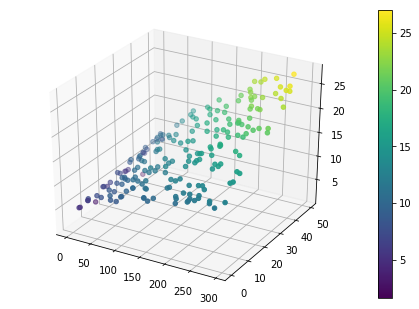

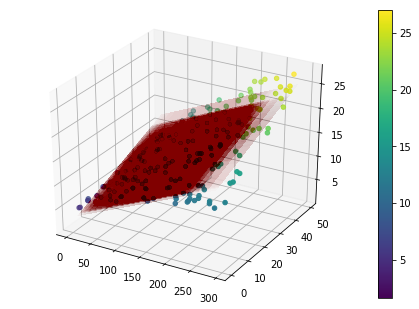

In [148]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
a=ax1.scatter(np.array(df['TV']),np.array(df['radio']),np.array(df['sales']),c=np.array(df['sales']))
cbar=plt.colorbar(a)
fig2 = plt.figure()
ax2 = Axes3D(fig2)
a=ax2.scatter(np.array(df['TV']),np.array(df['radio']),np.array(df['sales']),c=np.array(df['sales']))
cbar=plt.colorbar(a)
x, y = np.meshgrid(np.array(df['TV']),np.array(df['radio']))
z = res5.params[0]+(res5.params[1]*x)+(res5.params[2]*y)
ax2.plot_surface(x,y,z,color='red',alpha=0.002)